# Uber Analysis Apr-14

In [66]:
import pandas as pd
import numpy as np 
%pylab inline
import seaborn 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Importing dataset 

In [6]:
uber = pd.read_csv("uber-raw-data-apr14.csv") 

In [7]:
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [8]:
uber.describe()


,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [11]:
uber.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Split data/time string 

In [17]:
dt= '4/1/2014 0:11:00'
dt

'4/1/2014 0:11:00'

In [30]:
d,t=dt.split(' ')
print(d)
print(t)

4/1/2014
0:11:00


## Converting whole date/time into Timestamp

In [33]:
uber['Date/Time']= uber['Date/Time'].map(pd.to_datetime)

## creating separate Date of month Column 

In [35]:
def get_dom(dt):
    return dt.day
uber['dom']= uber['Date/Time'].map(get_dom)

In [36]:
uber.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [37]:
uber.head()


,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


## WeekDay

In [40]:
def get_wd(dt):
    return dt.weekday()
        
uber['weekday']= uber['Date/Time'].map(get_wd)
    
     

In [41]:
uber.head()


,Date/Time,Lat,Lon,Base,dom,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1


## Hour

In [43]:
def get_hour(dt):
    return dt.hour
uber['Hour']=uber['Date/Time'].map(get_hour)

In [44]:
uber.head()


,Date/Time,Lat,Lon,Base,dom,weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


## Analysis

## Analyze DOM

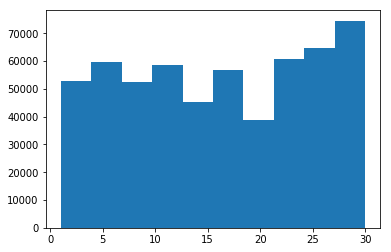

In [47]:
 hist(uber.dom);
    

Text(0.5,1,'Frequency by DOM uber-Apr-14')

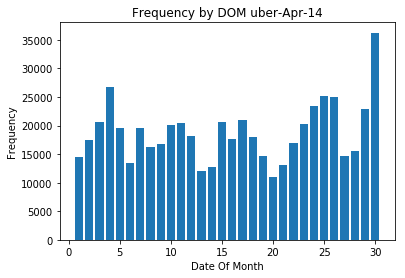

In [53]:
hist(uber.dom, bins=30,rwidth=0.8,range=[0.5,30.5]);
xlabel('Date Of Month')
ylabel('Frequency')
title ('Frequency by DOM uber-Apr-14')

In [54]:
def count_rows(row):
    return len(row)

by_date=uber.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [65]:
by_date_sorted=by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

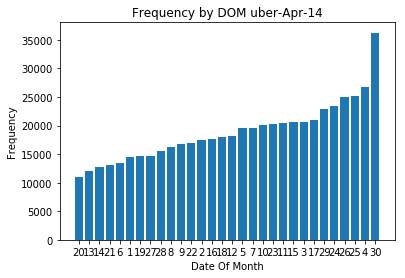

In [70]:
bar(range(1, 31),by_date_sorted)
xticks(range(1, 31),by_date_sorted.index)
xlabel('Date Of Month')
ylabel('Frequency')
title ('Frequency by DOM uber-Apr-14')
;

## Analyze The Hour

''

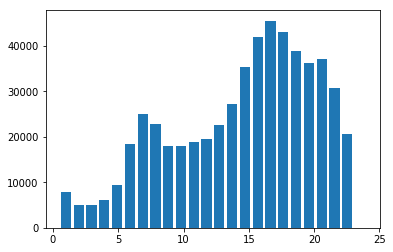

In [90]:
hist(uber.Hour,range=(.5,24),rwidth=.8,bins=24)
;

## Analyze The Weekday

''

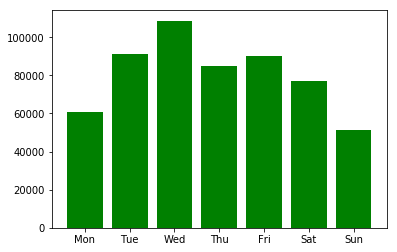

In [89]:
hist(uber.weekday,bins=7, rwidth=.8, range=[-.5,6.5],color='g')
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())
;

 ## Cross analysis (Hour,WD)

In [99]:
cross=uber.groupby('weekday Hour'.split()).apply(count_rows).unstack()
cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


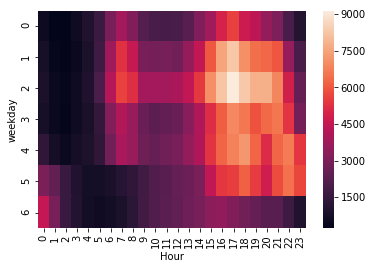

In [101]:
seaborn.heatmap(cross)

## Lat and Lon

''

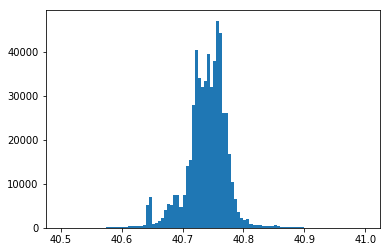

In [105]:
hist(uber.Lat, bins=100, range=[40.50,41.00])
;

''

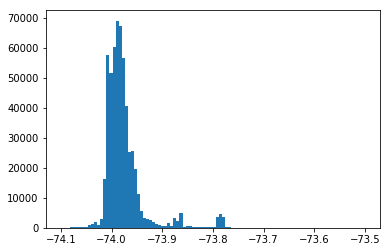

In [109]:
hist(uber.Lon, bins=100, range=[-74.1,-73.5])
;   

''

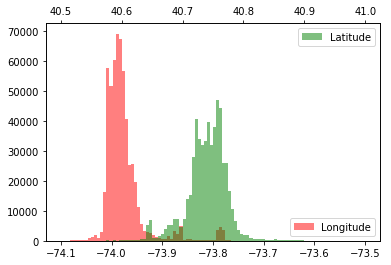

In [124]:

hist(uber.Lon, bins=100, range=[-74.1,-73.5],color='r',alpha=.5,label='Longitude')
legend(loc='lower right')

twiny()

hist(uber.Lat, bins=100, range=[40.50,41.00],alpha=.5,color='g',label='Latitude')
legend(loc='best')
;  

(40.7, 41)

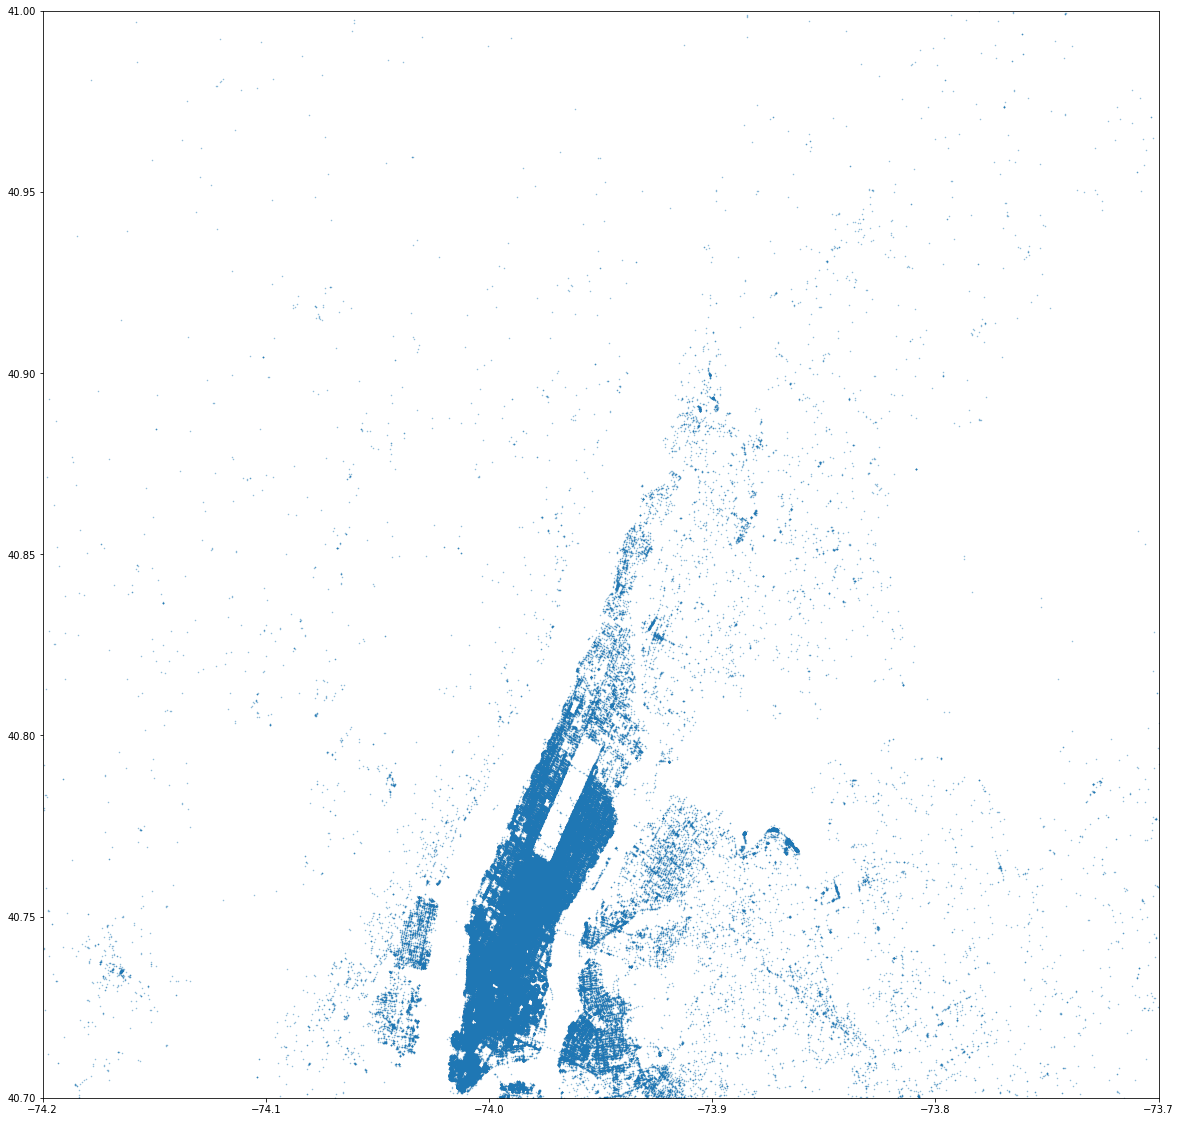

In [137]:
figure(figsize=(20,20))
plot(uber['Lon'],uber['Lat'],  '.',  ms=1, alpha=.5)

xlim(-74.2, -73.7)
ylim(40.7, 41)